<head><link rel = "stylesheet" href = "https://drive.google.com/uc?id=1zYOH-_Mb9jOjRbQmghdhsmZ2g6xAwakk"></head>

<table class = "header" width = 100%><tr>
    <th align = "left">Virtu Codility test, 2020/10/21</th>
    <th align = "right">Por: Gaston Solari Loudet</th>
</tr></table>

### <b><u>Imports y ajustes previos</u></b>

In [1]:
from math import exp, log, sqrt, floor, log10
import math, matplotlib.pyplot, numpy, urllib.request
URL = "https://drive.google.com/uc?id="
ID = "1yBlp28E_aSiuegP3uXKph3lU3uDyHsJR"
matplotlib.pyplot.style.use(URL + ID)
ID = "1qnqKr0jzE-qhqcW43ygq7WWwphOLRA5x"
urllib.request.urlretrieve(URL + ID, "algoCompare.py");
from algoCompare import algoCompare

### <b><u>Distancia a Fibonacci</u></b>

Te doy un número "$F$", y me das su distancia al número de Fibonacci mas cercano.<br><u>Ecuaciones de ayuda</u>:

* $F(n) = F(n - 1) + F(n - 2)$ &emsp;&emsp;&emsp;&emsp; (<u>Condiciones iniciales</u>: "$F(0) = 0$" y "$F(1) = 1$")

Sea "$\phi \approx 1.618$"...

* $ F(n) = \frac{\phi^{n} - (1 - \phi)^{n}}{\sqrt{5}} \;\rightarrow\; \frac{\phi^{n}}{\sqrt{5}}  \qquad \qquad \qquad  n \approx \frac{\log F(n) + (\log 5)/2}{\log \phi} \;\rightarrow\; \frac{\log F(n)}{\log \phi} $

#### <b>1) <u>Original</u></b>

In [5]:
def FiboDistance1(F):
    phi = 1.618
    n = floor(log(F + log(5)/2)/log(phi))
    Fn0 = (phi**(n + 0) - (1 - phi)**(n + 0))/sqrt(5)
    Fn1 = (phi**(n + 1) - (1 - phi)**(n + 1))/sqrt(5)
    Fn2 = (phi**(n + 2) - (1 - phi)**(n + 2))/sqrt(5)
    steps = min(abs(Fn0 - F), abs(Fn1 - F), abs(Fn2 - F))
    return floor(steps)

#### <b>2) <u>Revisado</u></b>

In [6]:
def FiboDistance2(F):
    lower = [1, 2, 3, 5, 8, 13, 21, 34, 55]
    D_ = [abs(F - f) for f in lower]
    if (F <= max(lower)): return min(D_)
    phi = (sqrt(5) + 1)/2
    f_to_n = lambda x: log(x)/log(phi)
    n_to_f = lambda x: (phi**x)/sqrt(5)
    n = round(f_to_n(F))
    F_ = [n_to_f(n + i) for i in range(3)]
    D_ = [round(abs(F_n - F)) for F_n in F_]
    return min(D_)

#### <b><u>Comparación</u></b>

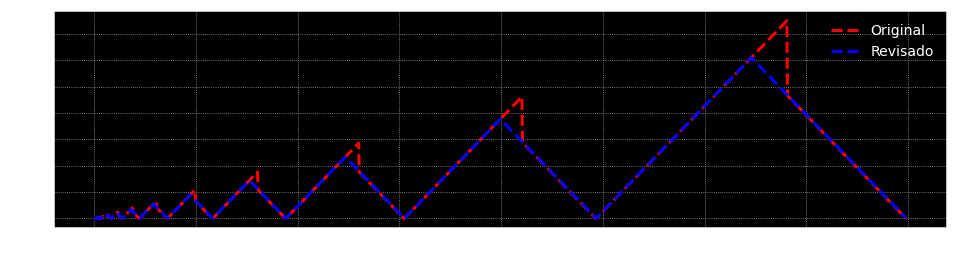

In [7]:
Figure, Axes = matplotlib.pyplot.subplots(figsize = (16, 4))
f2, f1, F = 0, 1, [0, 1]
Diffs = {1: [], 2: []}
for n in range(16):
    f2, f1 = f1, f1 + f2   ;   F.append(f1)
for f in range(max(F)):
    Diffs[1].append(FiboDistance1(f))
    Diffs[2].append(FiboDistance2(f))
Axes.plot(Diffs[1], "r--", lw = 3, label = "Original");
Axes.plot(Diffs[2], "b--", lw = 3, label = "Revisado");
Axes.legend(fontsize = 14);
Axes.set_ylabel("Diferencia con próximo Fibonacci",
                fontsize = 12, fontweight = "bold");

### <b><u>Substrings con una única letra</u></b>

Te doy un string "``S``" y contas cuantos substrings existen adonde solamente hay una única letra que se repite. Strings individuales valen como una de ellas.

#### <b>1) <u>Original</u></b>

In [ ]:
def subsUnique1(S):
    N, subs = 0, []
    for i in range(len(S)):
        for j in range(i, len(S)):
            subs.append(S[i : j + 1])
    for sub in subs:
        N += (len(set(sub)) == 1)
    return N

#### <b>2) <u>Revisado</u></b>

In [ ]:
def subsUnique2(S):
    N = j = 0
    for i in range(len(S)):
        if (S[i] != S[j]): j = i
        else: N += i - j
    return N

#### <b><u>Comparación</u></b>

Iteration: 500 | Next (Log): 0.27 seg

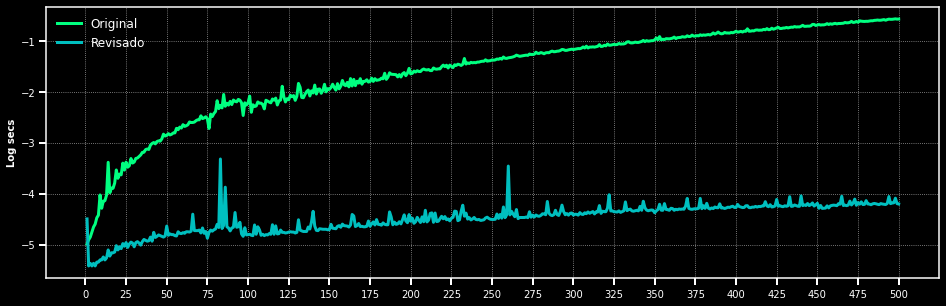

In [ ]:
import random
S = "".join([random.choice("abc") for i in range(500)])
methods = {"Original": lambda n: subsUnique1(S[:n]),
           "Revisado": lambda n: subsUnique2(S[:n])}
Figure, Axes = algoCompare(methods, span = len(S), logt = True)

### <b><u>Rectificación de arrays</u></b>

Te doy un array "``a``" de varios ``int``s. Por cada elemento "``arr[i]``...
* Si los vecinos en "``i - 1``" e "``i + 1``" son ambos menores, restale 1.
* Si los vecinos en "``i - 1``" e "``i + 1``" son ambos mayores, sumale 1.

Todo esto, hasta que ya no se pueda hacer nada.

#### <b>1) <u>Original</u></b>

In [ ]:
def arrayRect1(A):    
    L = len(A) - 2
    a_next = A.copy()
    while True:
        a_last = a_next.copy()
        for i in range(1, L + 1):
            try:
                a_tri = a_next[i - 1 : i + 2]
                a_1, a_i, a_2 = a_tri
            except: continue
            cond_inc = (a_i < a_1) and (a_i < a_2)
            cond_dec = (a_i > a_1) and (a_i > a_2)
            if cond_inc: a_next[i] += +1
            if cond_dec: a_next[i] += -1
        if (a_last == a_next): break
    return a_next

### <b><u>Conversión a HexSpeak</u></b>

Te doy un número "``n``" ("``int``"), y me devolves su palabra "``HexSpeak``":
* Es el string de "``n``" en hexadecimal, pero con algunas limitaciones...
* Únicos caracteres permitidos: "``A``", "``B``", "``C``", "``D``", "``E``", "``F``", "``I``" y "``O``".
* "``I``" sustituye a los "``1``", y "``O``" sustituye a los "``0``".
* Las cifras numéricas distintas de ``0`` y ``1`` no se pueden convertir.
* Cuando el hexadecimal sin poder convertirse, devolver "``ERROR``".

#### <b>1) <u>Original</u></b>

In [ ]:
def HexSpeak(n):
    S_hex = hex(int(n)).upper()[2:]
    S_hex = S_hex.replace("1", "I")
    S_hex = S_hex.replace("0", "O")
    invalid = [str(i) for i in range(2, 10)]
    invalid = set(invalid)
    S_set = set(S_hex)
    if S_set.intersection(invalid): return "ERROR"
    else: return S_hex

### <b><u>Caja de manzanas</u></b>

Tengo una caja que es capaz de cargar "``V0``" unidades de volumen. Tengo también un vector "``V``" con los volúmenes de varias manzanas de tamaño y forma diferente. Con esos 2 datos, debo encontrar cuantas de las manzanas puedo todavía meter en la caja, intentando maximizar esta cantidad.

In [ ]:
def AppleBox(V, V0 = 5000):
    for n, v in enumerate(V.sort()):
        V0 -= v
        if (V0 < 0): break
    return n